In [1]:
import torch

/nfs/dust/cms/user/loewetob/anaconda3/envs/mds_regression/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pyg

ModuleNotFoundError: No module named 'pyg'

In [2]:
import matplotlib.pyplot as plt

In [4]:
rng = np.random.default_rng(12345)


graphsizes = [13,14,16,13,14,16,13,15]
nodes = []

for size in graphsizes:
    nodes.append(rng.random((2, size)))

labels = []

for node in nodes:
    labels.append([node[0].mean(), node[1].mean()])

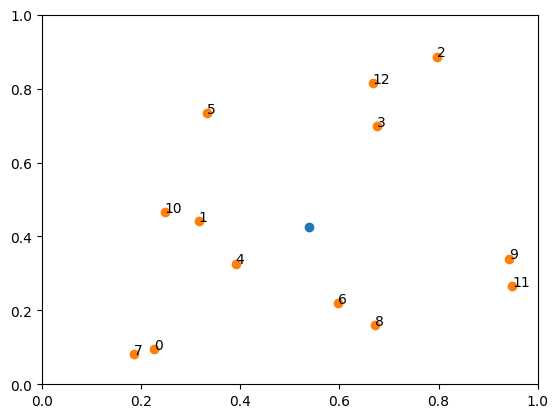

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(labels[0][0], labels[0][1])
ax.scatter(nodes[0][0], nodes[0][1])
ax.set_xlim(0,1)
ax.set_ylim(0,1)

for i in range(len(nodes[0][0])):
    ax.annotate(i, (nodes[0][0][i], nodes[0][1][i]))

In [13]:
print(nodes[0])
labelplot = np.transpose(labels)
for i in range(len(nodes)):
    nodes[i] = np.transpose(nodes[i])
print(nodes[0])

[[0.22733602 0.31675834 0.79736546 0.67625467 0.39110955 0.33281393
  0.59830875 0.18673419 0.67275604 0.94180287 0.24824571 0.94888115
  0.66723745]
 [0.09589794 0.44183967 0.88647992 0.6974535  0.32647286 0.73392816
  0.22013496 0.08159457 0.1598956  0.34010018 0.46519315 0.26642103
  0.8157764 ]]
[[0.22733602 0.09589794]
 [0.31675834 0.44183967]
 [0.79736546 0.88647992]
 [0.67625467 0.6974535 ]
 [0.39110955 0.32647286]
 [0.33281393 0.73392816]
 [0.59830875 0.22013496]
 [0.18673419 0.08159457]
 [0.67275604 0.1598956 ]
 [0.94180287 0.34010018]
 [0.24824571 0.46519315]
 [0.94888115 0.26642103]
 [0.66723745 0.8157764 ]]


In [18]:
def dist(node1, node2):
    x = np.absolute(node1[0] - node2[0])
    y = np.absolute(node1[1] - node2[1])
    return np.sqrt(np.power(x,2) + np.power(y,2))

def kNN(nodes):
    alldist = []
    for i in range(len(nodes)):
        distances = []
        for j in range(len(nodes)):
            distances.append(dist(nodes[i], nodes[j]))
        alldist.append(distances)
    return alldist

def kNN_full(dist, k):
    for i in range(len(dist)):
        

13

13

In [69]:
batch = torch.tensor([0 for i in range(len(nodes[0]))])
x = torch.tensor(nodes[0])

print(x.size())

edge_index = knn_graph(x = x, k = 3, batch = batch, loop = False)

torch.Size([13, 2])


AttributeError: 'NoneType' object has no attribute 'knn_graph'

In [ ]:
# make graph data
alldata = []

for node in nodes:
    

In [2]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

In [3]:
data

Data(x=[3, 1], edge_index=[2, 4])

In [40]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)